   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00


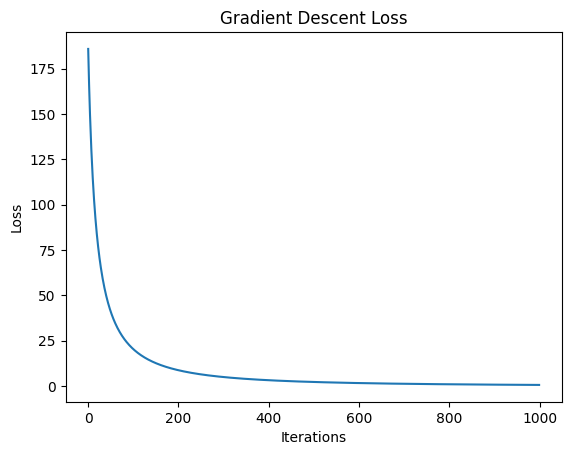

Approximate root of the cubic equation: -5.0


In [1]:
# =========================
# Step 1: Install Dependencies
# =========================
!pip install torch --quiet
!pip install fastai --quiet

# =========================
# Step 2: Import Libraries
# =========================
import torch
from torch import nn
import matplotlib.pyplot as plt

# =========================
# Step 3: Initialize Coefficients and Input
# =========================
# Coefficients for cubic equation: ax^3 + bx^2 + cx + d
a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([-3.0], requires_grad=True)
c = torch.tensor([2.0], requires_grad=True)
d = torch.tensor([-1.0], requires_grad=True)

# x values to evaluate
x = torch.linspace(-5, 5, 1000, requires_grad=True)

# =========================
# Step 4: Define Cubic Function with ReLU
# =========================
def cubic(x):
    return torch.relu(a*x**3 + b*x**2 + c*x + d)

# =========================
# Step 5: Define Loss Function
# =========================
def loss_fn(x):
    y_pred = cubic(x)
    return (y_pred**2).mean()  # Mean squared error-like loss

# =========================
# Step 6: Setup Optimizer (SGD)
# =========================
optimizer = torch.optim.SGD([x], lr=0.01)

# =========================
# Step 7: Train with Gradient Descent
# =========================
losses = []

for i in range(1000):
    optimizer.zero_grad()
    loss = loss_fn(x)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

# Plot loss curve
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Gradient Descent Loss")
plt.show()

# =========================
# Step 8: Check the Root
# =========================
root_idx = torch.argmin(cubic(x))
root = x[root_idx].item()
print(f"Approximate root of the cubic equation: {root}")

# =========================
# Step 9: Save Notebook
# =========================
# File → Download → .ipynb, then upload to GitHub
